In [197]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
logins = pd.read_csv('takehome_user_engagement.csv')
logins['time_stamp'] = pd.to_datetime(logins['time_stamp'])
logins[logins.user_id == 2]

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1
6,2014-01-08 03:45:04,2,1
7,2014-02-03 03:45:04,2,1
8,2014-02-08 03:45:04,2,1
9,2014-02-09 03:45:04,2,1
10,2014-02-13 03:45:04,2,1


In [198]:
users = pd.read_csv('takehome_users.csv',encoding='ISO-8859-1')
users['user_id'] = users['object_id']
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,2
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,3
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,4
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,5


In [199]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
 10  user_id                     12000 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 1.0+ MB


In [200]:
#create features from email domains
users['domain'] = users['email'].str.split('@').str[1]
users['is_gmail'] = np.where(users['domain'] == 'gmail.com',1,0)
users['is_yahoo'] = np.where(users['domain'] == 'yahoo.com',1,0)
#dummy columns for creation source
users = pd.get_dummies(users,columns = ['creation_source'])
users = users.drop(['email','name','creation_time','object_id','last_session_creation_time','org_id','invited_by_user_id','domain'], axis = 1)
users = users.dropna()
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   opted_in_to_mailing_list            12000 non-null  int64
 1   enabled_for_marketing_drip          12000 non-null  int64
 2   user_id                             12000 non-null  int64
 3   is_gmail                            12000 non-null  int64
 4   is_yahoo                            12000 non-null  int64
 5   creation_source_GUEST_INVITE        12000 non-null  uint8
 6   creation_source_ORG_INVITE          12000 non-null  uint8
 7   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8
 8   creation_source_SIGNUP              12000 non-null  uint8
 9   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8
dtypes: int64(5), uint8(5)
memory usage: 621.1 KB


In [174]:
#Get the number of days between previous 3 logins
logins['prev_3'] = logins['time_stamp'] - logins.groupby('user_id')['time_stamp'].shift(2)
logins['prev_3'].fillna(pd.to_timedelta('999 days'),inplace=True)
#Users marked as adopted if they have 3+ logins within a 7 day period
logins['adopted'] = np.where((logins['prev_3']/np.timedelta64(1, 'D')).astype(int) <= 7, 1, 0)
logins[logins.user_id == 2]

,time_stamp,user_id,visited,prev_3,adopted
1,2013-11-15 03:45:04,2,1,999 days,0
2,2013-11-29 03:45:04,2,1,999 days,0
3,2013-12-09 03:45:04,2,1,24 days,0
4,2013-12-25 03:45:04,2,1,26 days,0
5,2013-12-31 03:45:04,2,1,22 days,0
6,2014-01-08 03:45:04,2,1,14 days,0
7,2014-02-03 03:45:04,2,1,34 days,0
8,2014-02-08 03:45:04,2,1,31 days,0
9,2014-02-09 03:45:04,2,1,6 days,1
10,2014-02-13 03:45:04,2,1,5 days,1


In [175]:
login_agg = logins.groupby('user_id').sum()
login_agg['adopter'] = np.where(login_agg['adopted'] > 0, 1,0)
login_agg.head()

,visited,adopted,adopter
user_id,,,
1,1,0,0
2,14,3,1
3,1,0,0
4,1,0,0
5,1,0,0


In [176]:
df = pd.merge(login_agg,users,on='user_id')
df = df.drop(['user_id','adopted','visited'], axis = 1)
df.head()

,adopter,opted_in_to_mailing_list,enabled_for_marketing_drip,is_gmail,is_yahoo,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,0,1,0,0,1,1,0,0,0,0
1,1,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,1,1,0,0,0,0


In [277]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
ss = StandardScaler()
y= df.adopter
X = df.drop('adopter',axis = 1)
over = SMOTE(sampling_strategy=1)
#under = RandomUnderSampler(sampling_strategy=.5)
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)
counter = Counter(y_train)
print(counter)
X_train, y_train = pipeline.fit_resample(X_train, y_train)
counter = Counter(y_train)
print(counter)
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

Counter({0: 5393, 1: 1224})
Counter({0: 5393, 1: 5393})


In [291]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
#Create and train the model
xgb = XGBClassifier(random_state=0,learning_rate=.5,use_label_encoder=False);
xgb.fit(X_train, y_train);

rf = RandomForestClassifier(random_state = 0);
rf.fit(X_train, y_train);

[08:12:43] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


              precision    recall  f1-score   support

 Non-Adopter       0.82      0.50      0.62      1774
     Adopter       0.21      0.56      0.31       432

    accuracy                           0.51      2206
   macro avg       0.52      0.53      0.46      2206
weighted avg       0.70      0.51      0.56      2206



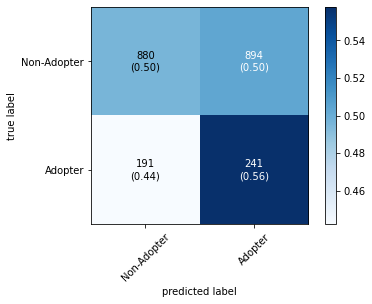

In [292]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
target_names = ['Non-Adopter','Adopter']
#Make predictions on the test data set
y_pred = xgb.predict(X_test)
#print model performance metrics
print(classification_report(y_test, y_pred, target_names=target_names))
#visualize predictions
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   class_names = target_names,

                                   show_normed = True,
                                   colorbar = True)

              precision    recall  f1-score   support

 Non-Adopter       0.82      0.50      0.62      1774
     Adopter       0.21      0.56      0.31       432

    accuracy                           0.51      2206
   macro avg       0.52      0.53      0.46      2206
weighted avg       0.70      0.51      0.56      2206



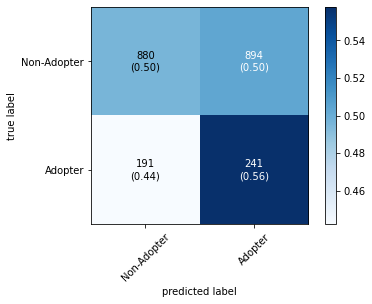

In [293]:
#Make predictions on the test data set
y_pred = rf.predict(X_test)
#print model performance metrics
print(classification_report(y_test, y_pred, target_names=target_names))
#visualize predictions
cm = confusion_matrix(y_test, y_pred, labels=xgb.classes_)
figure, ax = plot_confusion_matrix(conf_mat = cm,
                                   show_absolute = True,
                                   class_names = target_names,

                                   show_normed = True,
                                   colorbar = True)

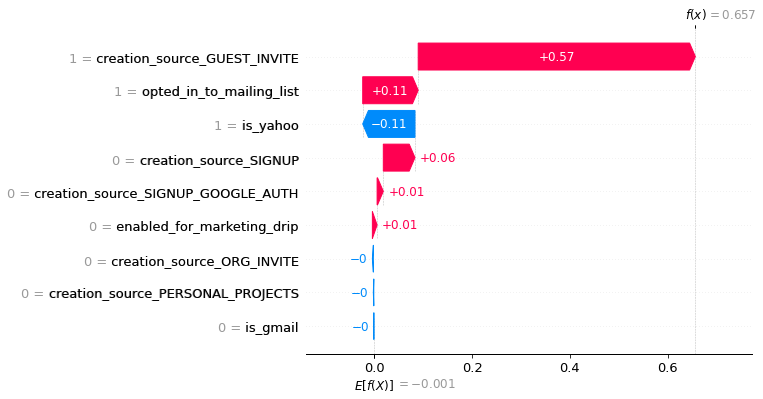

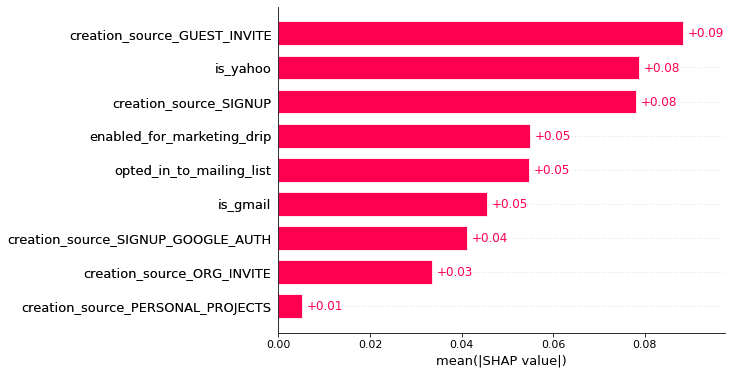

In [294]:
#Visualize the most important features
import shap
explainer = shap.Explainer(xgb)
shap_values = explainer(X)
shap.plots.waterfall(shap_values[0])
shap.plots.bar(shap_values)